/Users/frhyme/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
"""
- 우리는 좀전까지 Frozen world를 대상으로 강화학습을 수행했습니다. 그리고 Q(quality) table을 만들어서, 매 스텝이 reward에 얼마나 기여하는지를 측정했죠. 
- 이것이 가능했던 것은, action_space는 4이고, observation_space는 16(4 by 4)이기 때문입니다. 큐테이블이 16 by 4면 되니까요. 
- 하지만, 바둑, 아니 오목의 예를 들어봅시다. action_space와 obser_space가 너무 많아집니다.
    - 간단하게, 바둑판을 4*4로 두고, math.factorial(16)*2로만 계산해도, 41845579776000의 값이 나옵니다. 표현되는 observation_space가 너무 많다는 생각이 듭니다. 
- 실제로 강화학습을 적용해야 하는 경우는 아주 많은 관찰 가지수와, 액션 스페이스로 구성되는데, 이를 큐테이블로 적용할 수는 없어요. 
- 그래요. 좋습니다. 그럼 이제 어떻게 해야 하는지 알려주시죠? 
- a....Approximation!!. 
- 예측합시다 하하하핫

"""
print("dd")

In [10]:
import gym
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
"""
- obervation(현재 상황)을 입력받아서, 적절한 action을 내뱉는 네트워크를 구성합니다. 
- 사실, 이건 히든 레이어가 없는 네트워크라서 그냥 linear regression이라고 해도 상관없긴 합니다. 
"""
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)


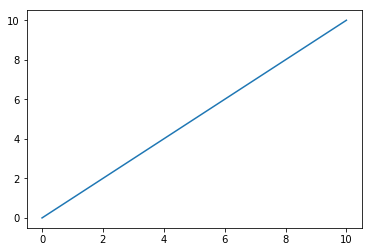